In [1]:
import numpy


In [2]:
import tensorflow as tf 
import tensorflow.keras as keras

In [3]:
from keras.constraints import max_norm


In [4]:
from keras.datasets import cifar10

In [5]:
# Set random seed for purposes of reproducibility
seed = 21

In [6]:
# Loading in the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [7]:
# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
from keras.utils import to_categorical

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
class_num = y_test.shape[1]

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(keras.layers.Activation('relu'))

In [12]:
model.add(keras.layers.Conv2D(32, 3, input_shape=(32, 32, 3), activation='relu', padding='same'))


In [13]:
model.add(keras.layers.Dropout(0.2))

In [14]:
model.add(keras.layers.BatchNormalization())

In [15]:
model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

In [16]:
model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
    
model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

In [17]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))

In [18]:
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())

In [19]:
model.add(keras.layers.Dense(class_num, activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                        

In [22]:
numpy.random.seed(21)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=64)

Epoch 1/25
782/782 [==============================] - 327s 415ms/step - loss: 1.5954 - accuracy: 0.4286 - val_loss: 1.2565 - val_accuracy: 0.5502
Epoch 2/25
782/782 [==============================] - 326s 417ms/step - loss: 1.1553 - accuracy: 0.5924 - val_loss: 0.9203 - val_accuracy: 0.6790
Epoch 3/25
782/782 [==============================] - 316s 404ms/step - loss: 0.9684 - accuracy: 0.6625 - val_loss: 0.8486 - val_accuracy: 0.7027
Epoch 4/25
782/782 [==============================] - 313s 400ms/step - loss: 0.8760 - accuracy: 0.6970 - val_loss: 0.6860 - val_accuracy: 0.7612
Epoch 5/25
782/782 [==============================] - 313s 400ms/step - loss: 0.8075 - accuracy: 0.7202 - val_loss: 0.7030 - val_accuracy: 0.7556
Epoch 6/25
782/782 [==============================] - 313s 401ms/step - loss: 0.7618 - accuracy: 0.7360 - val_loss: 0.6578 - val_accuracy: 0.7736
Epoch 7/25
782/782 [==============================] - 313s 400ms/step - loss: 0.7191 - accuracy: 0.7519 - val_loss: 0.6349 -

In [23]:
# Model evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 81.64%


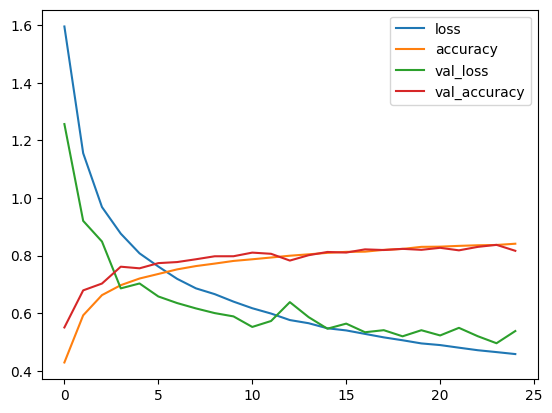

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.show()